In [1]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'../environments/'); import gw
sys.path.insert(0,'../environments/'); import gridworld_plotting as gp
sys.path.insert(0,'../rl_network/'); import ac
sys.path.insert(0,'../memory/'); import episodic as ec

from torch import autograd, optim, nn
import experiment as expt

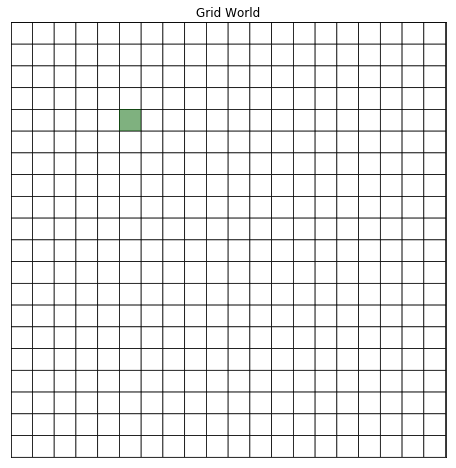

In [2]:
reload(gw)
# make environment
rows, columns = 20,20
env_type = None
penalty = -0.01 
reward_location = (4,5)
env = gw.GridWorld(rows=rows,cols=columns,env_type=env_type,
                   rewards = {reward_location:10},
                   step_penalization=penalty,
                   rewarded_action = None)
fig = gw.plotWorld(env,scale=0.4)

In [3]:
reload(expt)
reload(ac)

# set up parameters to make agent|
params = expt.Parameters(env,use_EC=False)

agent=ac.make_agent(params)
print(agent)

ActorCritic(
  (hidden): ModuleList(
    (0): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=5, stride=1, padding=1, dilation=1, ceil_mode=False)
    (2): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=5, stride=1, padding=1, dilation=1, ceil_mode=False)
    (4): Linear(in_features=432, out_features=200, bias=True)
    (5): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): ModuleList(
    (0): Linear(in_features=100, out_features=6, bias=True)
    (1): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [4]:
# get dataframe to store info from run 
data = {'total_reward': [],
            'loss': [[],[]],
            'psi_loss': [],
            'trial_length': [],
            'trials_run_to_date':0,
            'pol_tracking':[],
            'val_tracking':[],
            'ec_tracking': [],
            't': [],
            'mfcs':[],
        'sample_psi_infos':[[],[],[]]
           }

In [5]:
NUM_TRIALS = 1000
NUM_EVENTS = 300
ep_mem = ec.ep_mem(agent, 300)

In [11]:
reload(expt)
expt.run_expt(NUM_TRIALS, NUM_EVENTS, env, agent, data, get_samples=False, printfreq = 0.1, around_reward=True, radius=3)
#expt.run_mem_expt(NUM_TRIALS, NUM_EVENTS, env, agent, ep_mem, data, get_samples=False, printfreq = 0.1, around_reward=False)

0: start at (3, 5) 9.98 (0.009328842163085938s)
100: start at (4, 6) 10.0 (23.398321390151978s)
200: start at (3, 0) -2.99999999999998 (21.078702449798584s)
300: start at (4, 4) 9.72 (24.80116558074951s)
400: start at (3, 5) 9.1 (21.58174991607666s)
500: start at (12, 4) -2.99999999999998 (22.596553325653076s)
500
600: start at (5, 5) 9.92 (22.432711362838745s)
700: start at (13, 4) -2.99999999999998 (22.995486974716187s)
800: start at (5, 5) 9.98 (18.047929048538208s)
900: start at (16, 12) -2.99999999999998 (19.510865926742554s)
999: start at (5, 5) 10.0 (27.150101900100708s)


In [12]:
#sgd_data = data

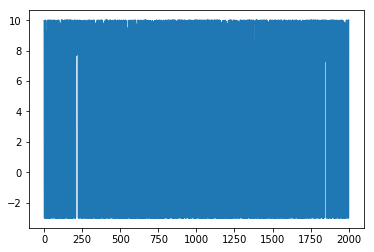

In [13]:
plt.plot(data['total_reward'])

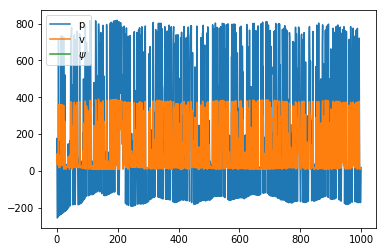

In [9]:
plt.plot(data['loss'][0], label='p')
plt.plot(data['loss'][1], label='v')
plt.plot(data['psi_loss'], label='$\psi$')
plt.legend(loc=0)
#plt.ylim([-10,10])

ValueError: need at least one array to concatenate

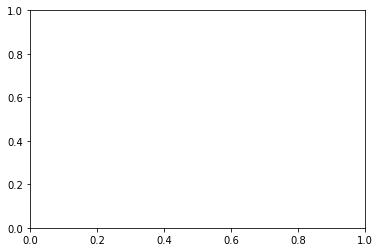

In [10]:
fig, ax = plt.subplots(1,1,sharey=True)
#index = 
#print(data['sample_psi_infos'][0][index])
c = ax.pcolor(np.vstack(data['sample_psi_infos'][1][-100:-1]), vmin=-5, vmax=5)
fig.tight_layout()
fig.colorbar(c)
plt.title(f'f')